In [534]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import evo
from evo.tools import plot
from evo.core import metrics
from evo.core.units import Unit
from evo.core import sync

import g2o_and_time_to_pose_data as gt2pd

In [535]:
dataset = "outdoor"
robots = ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth', 'apis', 'sobek'] \
    if dataset == "hybrid" or dataset == "tunnels" else \
    ['acl_jackal', 'acl_jackal2', 'sparkal1', 'sparkal2', 'hathor', 'thoth']
kmd_gt_csv = f"/media/masonbp/T7/data/kimera_multi/{dataset}/gt"

# outdoor

# time_file = "/home/masonbp/results/segment_track/kmd_outdoor/00_vio/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_outdoor/00_vio/00_evg/odom_0.2_lc_2.5/result_sparse_5.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_tunnels/05_fix_kimera/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_tunnels/05_fix_kimera/00_evg/odom_0.2_lc_2.5/result_sparse_6.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_tunnels/05_fix_kimera/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_tunnels/visual_lc/result_obj_odom.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_tunnels/05_fix_kimera/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_tunnels/visual_object_lc/result.g2o"

############## Hybrid

# time_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/time.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_lc/result.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/00/00_evg/odom_0.2_lc_2.5/result_sparse_7.g2o"

# time_file = "/home/masonbp/results/segment_track/kmd_hybrid/00/g2o/time_2m.txt"
# g2o_file = "/home/masonbp/results/offline_rpgo/kmd_hybrid/visual_object_lc/00/result_sparse_7.g2o"

############## Coarse Visual

time_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse/time.txt"

# g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse/my_odom/odom_0.2_lc_0.4/result.g2o"
g2o_file = f"/home/masonbp/results/offline_rpgo/kmd_{dataset}/visual_coarse_object/result.g2o"

pd_est, pd_gt = gt2pd.gt_csv_est_g2o_to_pose_data(g2o_file, time_file, {i: f"{kmd_gt_csv}/{robots[i]}.csv" for i in range(len(robots))})

0.0
0.0


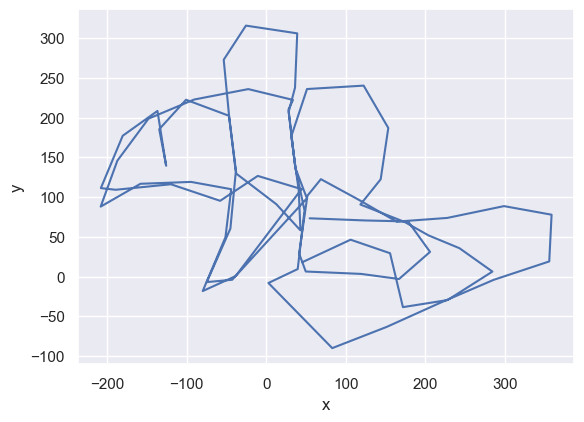

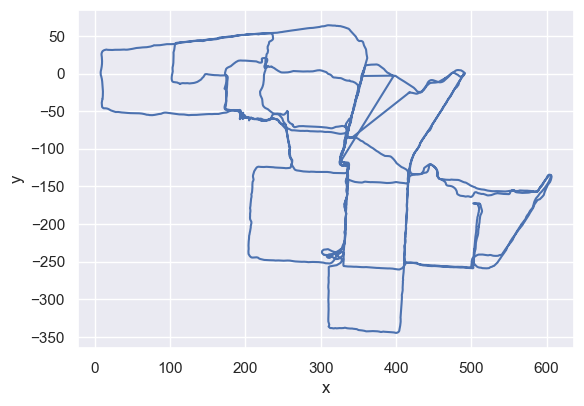

In [536]:
print(pd_est.t0 - pd_gt.t0)
print(pd_est.tf - pd_gt.tf)

pd_est.plot2d(t=pd_est.times[::30])
plt.show()

pd_gt.plot2d(t=pd_gt.times[::10])
plt.show()

In [537]:
traj_ref = pd_gt.to_evo()
traj_est = pd_est.to_evo()

max_diff = 0.01

traj_ref, traj_est = sync.associate_trajectories(traj_ref, traj_est, max_diff)

traj_est_aligned = copy.deepcopy(traj_est)
traj_est_aligned.align(traj_ref, correct_scale=False, correct_only_scale=False)

(array([[-0.97453856, -0.14267401,  0.17297032],
        [ 0.16530936, -0.97836827,  0.12437177],
        [ 0.15148405,  0.1497987 ,  0.97704295]]),
 array([391.96019274, -21.48970179, -21.85292581]),
 1.0)

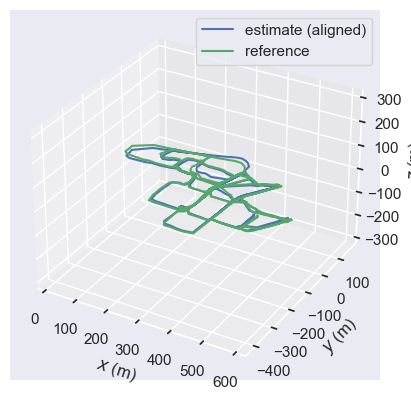

In [538]:
fig = plt.figure()
traj_by_label = {
    # "estimate (not aligned)": traj_est,
    "estimate (aligned)": traj_est_aligned,
    "reference": traj_ref
}
plot.trajectories(fig, traj_by_label, plot.PlotMode.xyz)
plt.show()

In [539]:
pose_relation = metrics.PoseRelation.translation_part
use_aligned_trajectories = True

In [540]:
if use_aligned_trajectories:
    data = (traj_ref, traj_est_aligned) 
else:
    data = (traj_ref, traj_est)

In [541]:
ape_metric = metrics.APE(pose_relation)
ape_metric.process_data(data)

In [542]:
ape_stat = ape_metric.get_statistic(metrics.StatisticsType.rmse)
print(ape_stat)

9.689978938214532


In [543]:
ape_stats = ape_metric.get_all_statistics()
for stat_key, stat_value in ape_stats.items():
    print(f"{stat_key}:\n{stat_value}")

rmse:
9.689978938214532
mean:
7.824811822315615
median:
6.777480033904027
std:
5.715593737171232
min:
0.8438945812778328
max:
41.87706579033889
sse:
44506.55792412154
